In [1]:
import pandas as pd 

In [2]:
import os 
os.getcwd()

'/home/maciektr/Programowanie/AGH_Laby/parallel_lab/cuda/Lab1'

In [92]:
df = pd.read_csv("./0_Simple/vectorAdd/res.txt")\
.sort_values(['elements', 'type', 'threads_per_block', 'blocks_per_grid'])\
.reset_index().drop(columns=["index"])
df

,elements,time,type,threads_per_block,blocks_per_grid
0,5000,0.019456,cpu,NaN,NaN
1,5000,1.073056,gpu,32.0,157.0
2,5000,0.935136,gpu,64.0,79.0
3,5000,0.986880,gpu,128.0,40.0
4,5000,0.921024,gpu,256.0,20.0
5,5000,1.238368,gpu,512.0,10.0
6,50000,0.188416,cpu,NaN,NaN
7,50000,1.076416,gpu,32.0,1563.0
8,50000,0.995840,gpu,64.0,782.0
9,50000,1.157600,gpu,128.0,391.0


In [62]:
df.columns.values

array(['elements', 'time', 'type', 'threads_per_block', 'blocks_per_grid'],
      dtype=object)

In [63]:
latex = df.style.to_latex()
print(latex)

\begin{tabular}{lrrlrr}
 & elements & time & type & threads_per_block & blocks_per_grid \\
0 & 5000 & 0.019456 & cpu & nan & nan \\
1 & 5000 & 1.073056 & gpu & 32.000000 & 157.000000 \\
2 & 5000 & 0.935136 & gpu & 64.000000 & 79.000000 \\
3 & 5000 & 0.986880 & gpu & 128.000000 & 40.000000 \\
4 & 5000 & 0.921024 & gpu & 256.000000 & 20.000000 \\
5 & 5000 & 1.238368 & gpu & 512.000000 & 10.000000 \\
6 & 50000 & 0.188416 & cpu & nan & nan \\
7 & 50000 & 1.054368 & gpu & 32.000000 & 1563.000000 \\
8 & 50000 & 1.076416 & gpu & 32.000000 & 1563.000000 \\
9 & 50000 & 0.995840 & gpu & 64.000000 & 782.000000 \\
10 & 50000 & 1.157600 & gpu & 128.000000 & 391.000000 \\
11 & 50000 & 0.990336 & gpu & 256.000000 & 196.000000 \\
12 & 50000 & 1.080864 & gpu & 512.000000 & 98.000000 \\
13 & 500000 & 1.808384 & cpu & nan & nan \\
14 & 500000 & 3.273312 & gpu & 32.000000 & 15625.000000 \\
15 & 500000 & 3.073728 & gpu & 64.000000 & 7813.000000 \\
16 & 500000 & 3.510112 & gpu & 128.000000 & 3907.000000 \\


In [82]:
df = df.fillna(value=256)
type_times = df.loc[df['threads_per_block']==256].drop(columns=['threads_per_block', 'blocks_per_grid'])\
     .pivot(values='time', columns='type', index='elements')
type_times

type,cpu,gpu
elements,,
5000,0.019456,0.921024
50000,0.188416,0.990336
500000,1.808384,2.962688
5000000,24.389631,12.097664
10000000,49.402882,24.098751
100000000,447.545349,221.865829


<AxesSubplot:title={'center':'Calculation time (s), logarithmic scale, by runtime type.'}, xlabel='elements'>

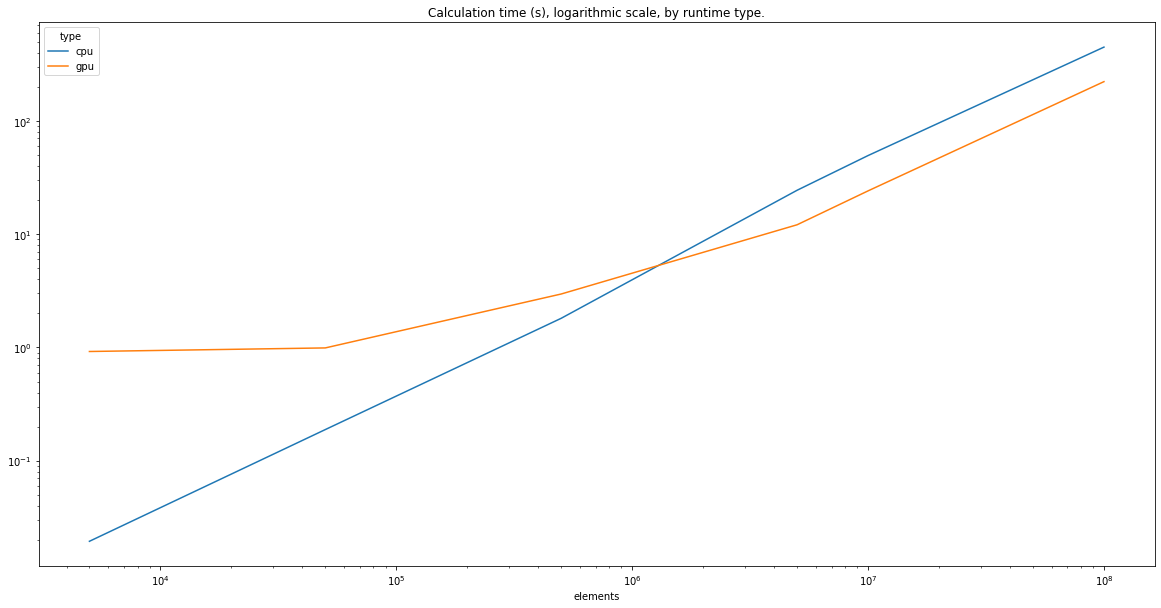

In [83]:
type_times.plot(logx=True, logy=True, figsize=(20,10), title="Calculation time (s), logarithmic scale, by runtime type.")

In [103]:
gpu_all_times = df.loc[df['type'] == 'gpu'].drop(columns=['type', 'blocks_per_grid'])
gpu_all_times

,elements,time,threads_per_block
1,5000,1.073056,32.0
2,5000,0.935136,64.0
3,5000,0.986880,128.0
4,5000,0.921024,256.0
5,5000,1.238368,512.0
7,50000,1.076416,32.0
8,50000,0.995840,64.0
9,50000,1.157600,128.0
10,50000,0.990336,256.0
11,50000,1.080864,512.0


In [109]:
gpu_times = gpu_all_times\
    .pivot(values='time', 
           columns='threads_per_block', 
           index='elements'
    )
gpu_times

threads_per_block,32.0,64.0,128.0,256.0,512.0
elements,,,,,
5000,1.073056,0.935136,0.986880,0.921024,1.238368
50000,1.076416,0.995840,1.157600,0.990336,1.080864
500000,3.273312,3.073728,3.510112,2.962688,4.000768
5000000,12.969472,12.517504,13.730528,12.097664,12.685152
10000000,31.789600,23.785185,26.165279,24.098751,28.189184
100000000,372.130005,313.858063,229.868637,221.865829,234.037064


<AxesSubplot:title={'center':'GPU calculation time by threads per block count, logarithmic scale.'}, xlabel='elements'>

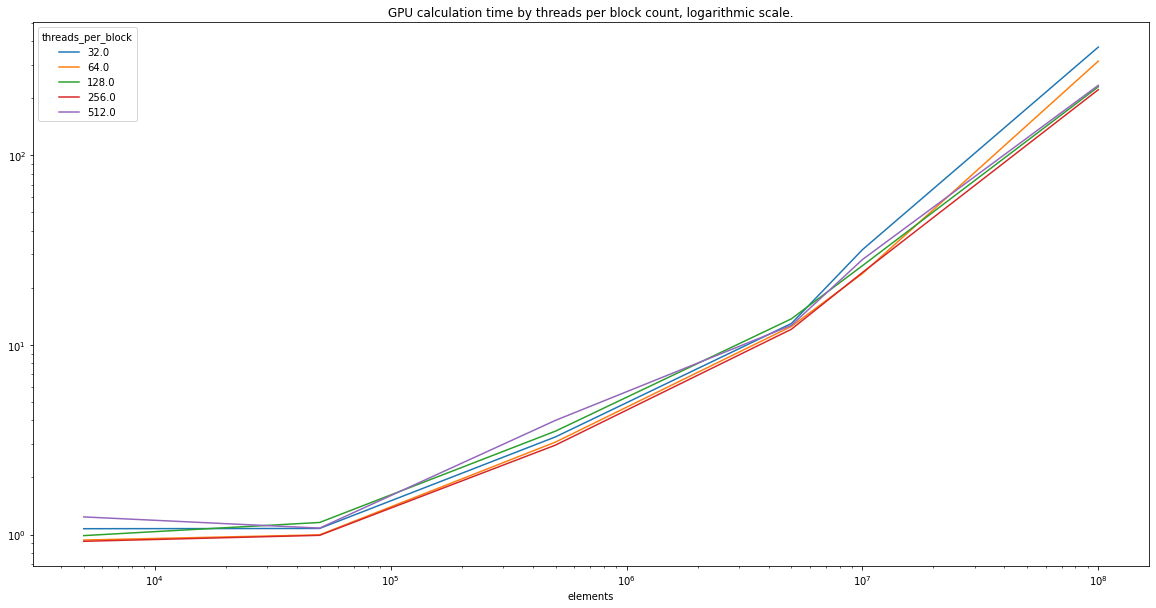

In [116]:
gpu_times.plot(logx=True, logy=True, figsize=(20,10), title="GPU calculation time by threads per block count, logarithmic scale.")

<AxesSubplot:title={'center':'GPU calculation time by threads per block count.'}, xlabel='elements'>

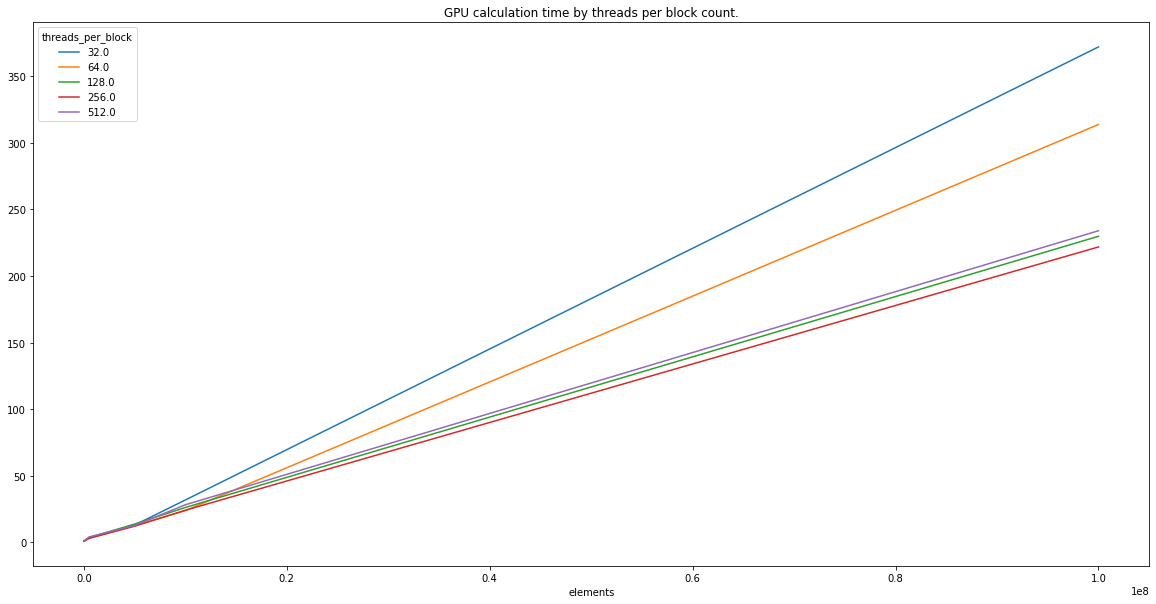

In [117]:
gpu_times.plot(figsize=(20,10), title="GPU calculation time by threads per block count.")